```python

import numpy as np
import matplotlib.pyplot as plt

def eliptica_jacobi(cc1x, cc2x, cc1y, cc2y, f, a, b, nx, c, d, ny, maxiter, tol):
    h = (b - a) / nx
    x = np.linspace(a, b, nx+1)
    k = (d - c) / ny
    y = np.linspace(c, d, ny+1)
    U = np.zeros((ny+1, nx+1))

    c1x = cc1x(x)
    c2x = cc2x(x)
    c1y = cc1y(y)
    c2y = cc2y(y)

    #u0 = (np.sum(c1x + c2x) / (nx + 1) + np.sum(c1y + c2y) / (ny + 1)) / 4
    #U = u0 * np.ones((ny + 1, nx + 1))
    U[0, :] = c1y
    U[-1, :] = c2y
    U[:, 0] = c1x
    U[:, -1] = c2x

    lambda_val = k / h
    p = lambda_val**2 / (2 * (lambda_val**2 + 1))
    q = 1 / (2 * (lambda_val**2 + 1))
    r = k**2 / (2 * (lambda_val**2 + 1))

    iter = 1
    error = tol + 1
    V = np.copy(U)

    while iter < maxiter and error > tol:
        for j in range(1, ny):
            for i in range(1, nx):
                V[i, j] = p * (U[i+1, j] + U[i-1, j]) + q * (U[i, j+1] + U[i, j-1]) - r * f(x[i], y[j])

        error = np.max(np.abs(U - V))
        U = np.copy(V)
        iter += 1

    X, Y = np.meshgrid(x, y)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(X, Y, U, cmap='viridis')
    fig.colorbar(surf)
    plt.show()

    return U, x, y, iter, error


# Definición de las funciones
cc1x = lambda x: np.zeros_like(x)
cc2x = lambda x: 100*x
cc1y = lambda y: np.zeros_like(y)
cc2y = lambda y: 100*y
f = lambda x, y: 0

a = 0
b = 1
nx = 4
c = 0
d = 1
ny = 4
maxiter = 100
tol = 1e-9

eliptica_jacobi(cc1x, cc2x, cc1y, cc2y, f, a, b, nx, c, d, ny, maxiter, tol)

```

In [1]:
using LinearAlgebra
using Plots

In [5]:
function eliptica_jacobi(fa, fb, fc, fd, a, b, c, d, nx,ny,f, maxiter, tol)
    
    x = LinRange(a, b, nx+1)
    y = LinRange(c, d, ny+1)
    h = (b - a) / nx
    k = (d - c) / ny
    U = zeros(ny+1, nx+1)

    U[1, :] = map(fa, x)
    U[end, :] = map(fb, x)
    U[:, 1] = map(fc, y)
    U[:, end] = map(fd, y)
    
    lambda_val = k / h
    p = lambda_val^2 / (2 * (lambda_val^2 + 1))
    q = 1 / (2 * (lambda_val^2 + 1))
    r = k^2 / (2 * (lambda_val^2 + 1))

    iter = 1
    error = tol + 1
    V = copy(U)

    while iter < maxiter && error > tol
        for j in 2:ny
            for i in 2:nx
                #V[i, j] = p * (U[i+1, j] + U[i-1, j]) + q * (U[i, j+1] + U[i, j-1]) - r * f(x[i], y[j])
                V[j,i] = p * (U[j,i+1] + U[j,i-1]) + q * (U[j+1,i] + U[j-1,i]) - r * f(x[i], y[j])
            end
        end
        error = maximum(abs.(U .- V))
        U = copy(V)
        iter += 1
    end
    
    return x,y,U, iter, error
end

eliptica_jacobi (generic function with 1 method)

In [8]:
# Define the functions
fa(y) = 0.0
fb(y) = 100*y
fc(x) = 0.0
fd(x) = 100*x
f(x, y) = 0.0

# Define parameters
a = 0
b = 1
nx = 4
c = 0
d = 1
ny = 4
maxiter = 100
tol = 1e-9

# Call the eliptica_jacobi function
x,y,U, iter, error = eliptica_jacobi(fa, fb, fc, fd, a, b, c, d, nx,ny, f, maxiter, tol)
display(U)
println("Number of iterations: $iter")
println("Error: $error")

5×5 Matrix{Float64}:
 0.0   0.0    0.0   0.0     0.0
 0.0   6.25  12.5  18.75   25.0
 0.0  12.5   25.0  37.5    50.0
 0.0  18.75  37.5  56.25   75.0
 0.0  25.0   50.0  75.0   100.0

Number of iterations: 69
Error: 7.275957614183426e-10


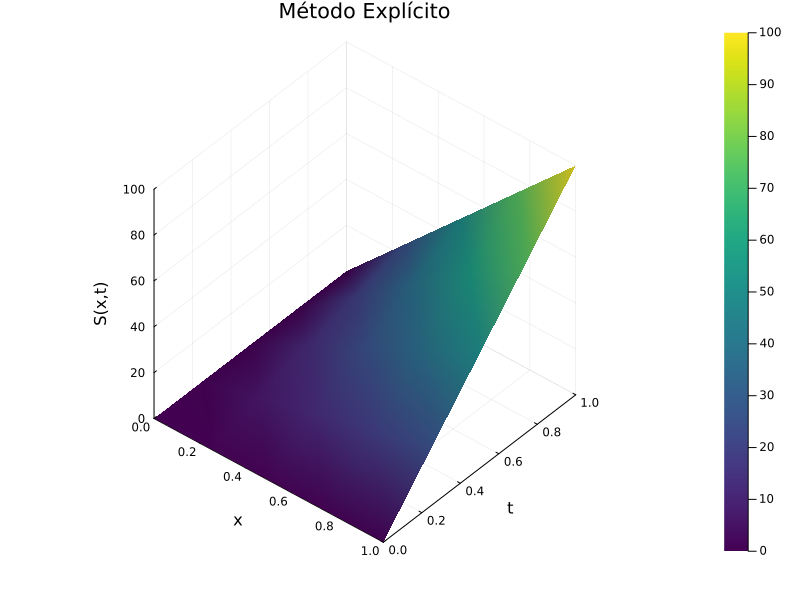

In [9]:
surface(x,y, U, 
        camera=(40,40),
        size=(800,600), 
        c=:viridis, 
        title="Método Explícito",
        xlabel="x",
        ylabel="t",
        zlabel="S(x,t)")